In [1]:
import pandas as pd
import numpy as np

# 1. Define the dataset
data = {
    'S1': [2, 4, 4, 4, 6, 6],
    'S2': [4, 6, 4, 2, 4, 2],
    'Test Class': ['Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive']
}
df = pd.DataFrame(data)

# The point we want to classify
new_point = np.array([6, 6])
k_value = 3

print("--- Dataset ---")
print(df)
print(f"\n--- Prediction for Point {new_point} with k={k_value} ---")

# 2. Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    """Calculates the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2)**2))

# 3. Function to perform k-NN classification
def knn_classify(df, new_point, k):
    """
    Performs k-NN classification.

    Args:
        df (pd.DataFrame): The training dataset.
        new_point (np.array): The point to classify.
        k (int): The number of neighbors.

    Returns:
        str: The predicted class.
    """
    # a. Separate features (S1, S2) from the class
    X = df[['S1', 'S2']].values
    y = df['Test Class'].values

    # b. Calculate the distance from the new_point to every other point
    distances = []
    for i, feature_point in enumerate(X):
        dist = euclidean_distance(feature_point, new_point)
        distances.append((dist, y[i], feature_point)) # (distance, class, original_point)

    # c. Sort the distances and take the top k
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]

    print("\nTop k-Nearest Neighbors:")
    for dist, class_label, features in k_nearest_neighbors:
        print(f"  Point {features}: Distance = {dist:.2f}, Class = {class_label}")

    # d. Count the votes for each class
    class_votes = {}
    for _, class_label, _ in k_nearest_neighbors:
        class_votes[class_label] = class_votes.get(class_label, 0) + 1

    # e. Find the class with the most votes (the predicted class)
    # Using 'max' with a lambda to get the key with the max value
    predicted_class = max(class_votes, key=class_votes.get)

    return predicted_class

# 4. Run the classification
predicted_class = knn_classify(df, new_point, k_value)

# 5. Output the result
print(f"\nClass Votes: {predicted_class}")
print(f"The predicted class for the point {new_point} is: **{predicted_class}**")

--- Dataset ---
   S1  S2 Test Class
0   2   4   Negative
1   4   6   Negative
2   4   4   Positive
3   4   2   Negative
4   6   4   Negative
5   6   2   Positive

--- Prediction for Point [6 6] with k=3 ---

Top k-Nearest Neighbors:
  Point [4 6]: Distance = 2.00, Class = Negative
  Point [6 4]: Distance = 2.00, Class = Negative
  Point [4 4]: Distance = 2.83, Class = Positive

Class Votes: Negative
The predicted class for the point [6 6] is: **Negative**


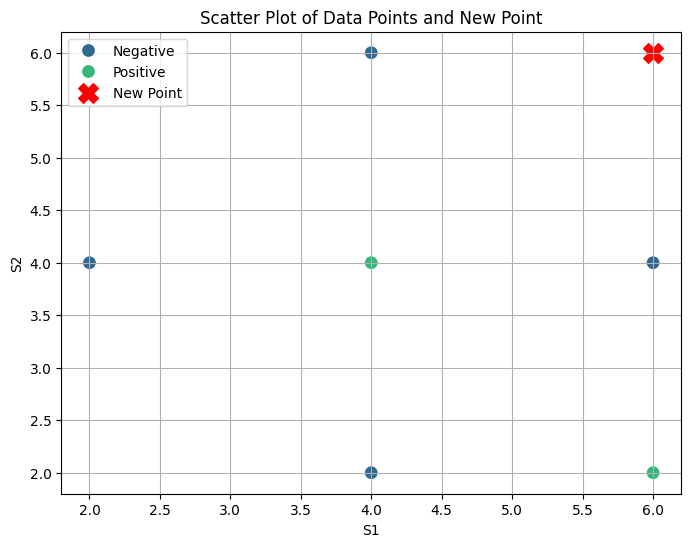

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='S1', y='S2', hue='Test Class', data=df, s=100, palette='viridis')

# Add the new point to the plot
plt.scatter(new_point[0], new_point[1], color='red', marker='X', s=200, label='New Point')

# Add labels and title
plt.xlabel('S1')
plt.ylabel('S2')
plt.title('Scatter Plot of Data Points and New Point')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()